In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('Data-Collisions.csv')

C:\Users\jenni\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#select features for analysis
df = raw[['SEVERITYCODE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]

df

,SEVERITYCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,NaN,N,Overcast,Wet,Daylight,NaN
1,1,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,NaN,0,Overcast,Dry,Daylight,NaN
3,1,NaN,N,Clear,Dry,Daylight,NaN
4,2,NaN,0,Raining,Wet,Daylight,NaN
...,...,...,...,...,...,...,...
194668,2,NaN,N,Clear,Dry,Daylight,NaN
194669,1,Y,N,Raining,Wet,Daylight,NaN
194670,2,NaN,N,Clear,Dry,Daylight,NaN
194671,2,NaN,N,Clear,Dry,Dusk,NaN


In [4]:
#missing data
df.replace('?',np.nan, inplace=True)
missing = df.isnull()
for column in missing.columns.values.tolist():
    print(column)
    print(missing[column].value_counts())
    print("")


SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64



C:\Users\jenni\Anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [5]:
df.dropna(subset=['UNDERINFL','WEATHER','ROADCOND','LIGHTCOND'],axis=0,inplace=True)

C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
for column in df.columns.values.tolist():
    print(column)
    print(df[column].value_counts())
    print("")

SEVERITYCODE
1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

INATTENTIONIND
Y    29723
Name: INATTENTIONIND, dtype: int64

UNDERINFL
N    99863
0    80376
Y     5103
1     3995
Name: UNDERINFL, dtype: int64

WEATHER
Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

ROADCOND
Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64

LIGHTCOND
Daylight                    116077
Dark - Street Lights On      48440
Unknown         

C:\Users\jenni\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,SEVERITYCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,NaN,0,Overcast,Wet,Daylight,NaN
1,1,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,NaN,0,Overcast,Dry,Daylight,NaN
3,1,NaN,0,Clear,Dry,Daylight,NaN
4,2,NaN,0,Raining,Wet,Daylight,NaN
...,...,...,...,...,...,...,...
123,1,NaN,0,Raining,Wet,Daylight,Y
124,2,NaN,1,Clear,Dry,Daylight,Y
125,2,NaN,0,Raining,Wet,Daylight,NaN
126,1,NaN,0,Raining,Wet,Daylight,NaN


In [7]:
#Balancing the dataset
from sklearn.utils import resample

df_maj = df[df.SEVERITYCODE==1]
df_min = df[df.SEVERITYCODE==2]
resample_df=resample(df_maj,replace=False,n_samples=57052,random_state=123)

new_df=pd.concat([resample_df,df_min])
new_df.SEVERITYCODE.value_counts()

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

In [8]:
for column in new_df.columns.values.tolist():
    print(column)
    print(new_df[column].value_counts())
    print("")

SEVERITYCODE
2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

INATTENTIONIND
Y    18624
Name: INATTENTIONIND, dtype: int64

UNDERINFL
N    60402
0    47752
Y     3313
1     2637
Name: UNDERINFL, dtype: int64

WEATHER
Clear                       68248
Raining                     20619
Overcast                    16951
Unknown                      6896
Snowing                       500
Other                         435
Fog/Smog/Smoke                337
Sleet/Hail/Freezing Rain       71
Blowing Sand/Dirt              30
Severe Crosswind               13
Partly Cloudy                   4
Name: WEATHER, dtype: int64

ROADCOND
Dry               76368
Wet               29449
Unknown            6850
Ice                 670
Snow/Slush          538
Other                78
Standing Water       67
Oil                  43
Sand/Mud/Dirt        41
Name: ROADCOND, dtype: int64

LIGHTCOND
Daylight                    71980
Dark - Street Lights On     29104
Unknown                      6087
Dusk  

In [9]:
#preprocessing the data
new_df['UNDERINFL'].replace(to_replace=['N','0','Y','1'],value=[0,0,1,1],inplace=True)


In [10]:
new_df['WEATHER'].replace(to_replace=['Clear',
                                      'Raining',
                                      'Overcast',
                                      'Partly Cloudy',
                                      'Snowing', 
                                      'Fog/Smog/Smoke',
                                      'Sleet/Hail/Freezing Rain',
                                      'Blowing Sand/Dirt',
                                      'Severe Crosswind',
                                      'Other','Unknown'],value=[1,2,3,4,5,6,7,8,9,10,11],inplace=True)


In [11]:
new_df['ROADCOND'].replace(to_replace=['Dry',
                                       'Sand/Mud/Dirt',
                                       'Wet','Standing Water',
                                       'Ice','Snow/Slush',
                                       'Other','Oil','Unknown'],value=[1,2,3,4,5,6,7,8,9],inplace=True)


In [12]:
new_df['LIGHTCOND'].replace(to_replace=['Daylight',
                                        'Dark - Street Lights On',
                                        'Dark - No Street Lights',
                                        'Dark - Street Lights Off',
                                        'Dusk','Dawn',
                                        'Other','Unknown',
                                        'Dark - Unknown Lighting'],value=[1,2,3,4,5,6,7,8,9],inplace=True)


In [13]:
for column in new_df.columns.values.tolist():
    print(column)
    print(new_df[column].value_counts())
    print("")

SEVERITYCODE
2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

INATTENTIONIND
Y    18624
Name: INATTENTIONIND, dtype: int64

UNDERINFL
0    108154
1      5950
Name: UNDERINFL, dtype: int64

WEATHER
1     68248
2     20619
3     16951
11     6896
5       500
10      435
6       337
7        71
8        30
9        13
4         4
Name: WEATHER, dtype: int64

ROADCOND
1    76368
3    29449
9     6850
5      670
6      538
7       78
4       67
8       43
2       41
Name: ROADCOND, dtype: int64

LIGHTCOND
1    71980
2    29104
8     6087
5     3713
6     1564
3      838
4      683
7      128
9        7
Name: LIGHTCOND, dtype: int64

SPEEDING
Y    6053
Name: SPEEDING, dtype: int64



In [14]:
#Feature selection
#INATTENTION AND SPEED ARE NOT INCLUDED DUE TO THE LIMITED DATA POINTS
x=new_df[['UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']]
y=new_df['SEVERITYCODE']

In [15]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=4)

In [17]:
#Machine Learning
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [29]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
Ks=60
mean_acc=np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx=[];
for n in range (1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    


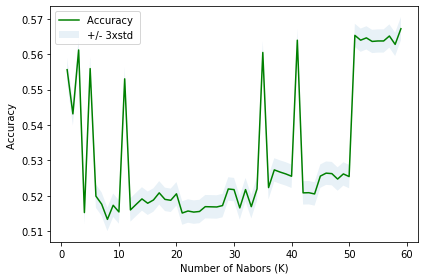

The best accuracy was with 0.5671968800666053 with k= 59


In [30]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc + 1 * std_acc,alpha=0.1)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print("The best accuracy was with", mean_acc.max(),"with k=", mean_acc.argmax()+1)

In [31]:
KNN = KNeighborsClassifier(n_neighbors=59).fit(x_train,y_train)
yhat_knn = KNN.predict(x_test)

In [32]:
# Jaccard_similarity Score
KNN_J = jaccard_similarity_score(y_test,yhat_knn)
KNN_f1 = f1_score(y_test,yhat_knn,average='weighted')

print('Jaccard Score=',KNN_J)
print('f1=',KNN_f1)

Jaccard Score= 0.5671968800666053
f1= 0.5377104545506456


C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [33]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy',max_depth=None)
DT.fit(x_train,y_train)
yhat_DT= DT.predict(x_test)
yhat_DT

array([2, 2, 1, ..., 2, 2, 1], dtype=int64)

In [35]:
# Jaccard_similarity Score
DT_J = jaccard_similarity_score(y_test,yhat_DT)

# F1
DT_f1 = f1_score(y_test,yhat_DT,average='weighted')

print('Jaccard Score=',DT_J)
print('f1=',DT_f1)

Jaccard Score= 0.5671968800666053
f1= 0.5377978116720531


In [36]:
#SVM
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(x_train,y_train)

yhat_svm=clf.predict(x_test)


In [37]:
# Jaccard_similarity Score
SVM_J = jaccard_similarity_score(y_test,yhat_svm)

# F1
SVM_f1 = f1_score(y_test,yhat_svm,average='weighted')

print('Jaccard Score=',SVM_J)
print('f1=',SVM_f1)

Jaccard Score= 0.5669777836203497
f1= 0.529275640032782


C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01, solver = 'liblinear')
LR.fit(x_train,y_train)
yhat_LR=LR.predict(x_test)

yhat_prob = LR.predict_proba(x_test)


In [39]:
# Jaccard_similarity Score
LR_J = jaccard_similarity_score(y_test,yhat_LR)

# F1
LR_f1 = f1_score(y_test,yhat_LR,average='weighted')

# LogLoss
LR_LogLoss=log_loss(y_test, yhat_prob)

print('Jaccard Score=',LR_J)
print('f1=',LR_f1)
print('LogLoss=',LR_LogLoss)

Jaccard Score= 0.5577319135883616
f1= 0.5340629249638291
LogLoss= 0.6675614717229866


C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [40]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.64      0.31      0.42     11410
           2       0.54      0.82      0.65     11411

    accuracy                           0.57     22821
   macro avg       0.59      0.57      0.54     22821
weighted avg       0.59      0.57      0.54     22821

Confusion matrix, without normalization
[[3590 7820]
 [2057 9354]]


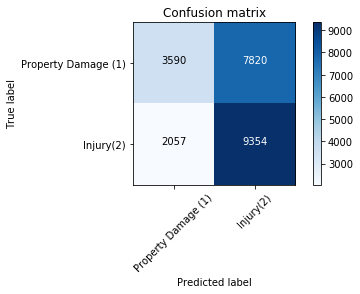

In [41]:
#KNN Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_knn))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage (1)','Injury(2)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           1       0.64      0.31      0.42     11410
           2       0.54      0.82      0.65     11411

    accuracy                           0.57     22821
   macro avg       0.59      0.57      0.54     22821
weighted avg       0.59      0.57      0.54     22821

Confusion matrix, without normalization
[[3594 7816]
 [2061 9350]]


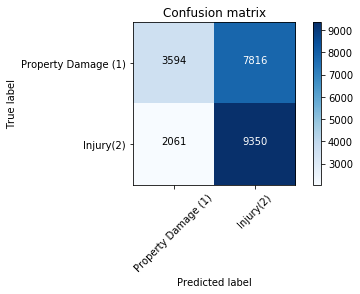

In [42]:
#Decision Tree Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_DT, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_DT))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage (1)','Injury(2)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           1       0.65      0.28      0.40     11410
           2       0.54      0.85      0.66     11411

    accuracy                           0.57     22821
   macro avg       0.60      0.57      0.53     22821
weighted avg       0.60      0.57      0.53     22821

Confusion matrix, without normalization
[[3240 8170]
 [1712 9699]]


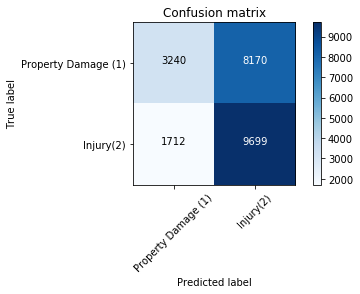

In [43]:
#SVM Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage (1)','Injury(2)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           1       0.61      0.33      0.43     11410
           2       0.54      0.78      0.64     11411

    accuracy                           0.56     22821
   macro avg       0.57      0.56      0.53     22821
weighted avg       0.57      0.56      0.53     22821

Confusion matrix, without normalization
[[3792 7618]
 [2475 8936]]


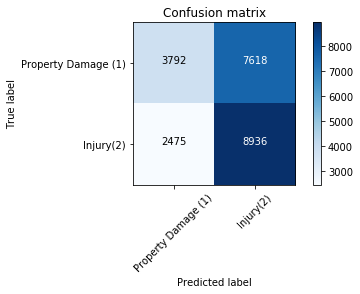

In [44]:
#Logistic Regression Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_LR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage (1)','Injury(2)'],normalize= False,  title='Confusion matrix')